In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ryogeshwari
Your Kaggle Key: ··········


100%|██████████| 238M/238M [00:02<00:00, 117MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

In [ ]:
train_df = pd.read_csv('/content/diabetic-retinopathy-224x224-2019-data/train.csv')

In [ ]:
print(train_df.head())
print(train_df.columns)

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Index(['id_code', 'diagnosis'], dtype='object')


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing the images
image_directory = '/content/diabetic-retinopathy-224x224-2019-data/colored_images'

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    directory=image_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3662 images belonging to 5 classes.


**CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes for severity levels
])

# Compile the model
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10)


Epoch 1/10
115/115 [==============================] - 472s 4s/step - loss: 1.0685 - accuracy: 0.6103
Epoch 2/10
115/115 [==============================] - 472s 4s/step - loss: 0.8688 - accuracy: 0.7013
Epoch 3/10
115/115 [==============================] - 456s 4s/step - loss: 0.8445 - accuracy: 0.7054
Epoch 4/10
115/115 [==============================] - 454s 4s/step - loss: 0.8072 - accuracy: 0.7141
Epoch 5/10
115/115 [==============================] - 451s 4s/step - loss: 0.8157 - accuracy: 0.7119
Epoch 6/10
115/115 [==============================] - 464s 4s/step - loss: 0.8022 - accuracy: 0.7160
Epoch 7/10
115/115 [==============================] - 466s 4s/step - loss: 0.8053 - accuracy: 0.7130
Epoch 8/10
115/115 [==============================] - 466s 4s/step - loss: 0.7880 - accuracy: 0.7176
Epoch 9/10
115/115 [==============================] - 459s 4s/step - loss: 0.7877 - accuracy: 0.7163
Epoch 10/10
115/115 [==============================] - 457s 4s/step - loss: 0.7839 - accura

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
# Get accuracy
accuracy = history.history['accuracy'][-1]
print("Final training accuracy:", accuracy)

Final training accuracy: 0.7209175229072571


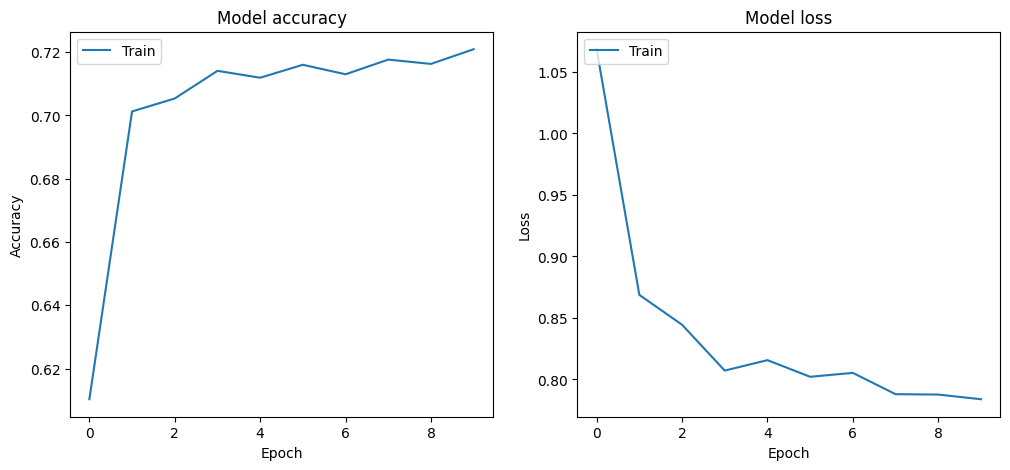

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')

plt.show()

**CAPSULE NETWORKS**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import layers

def CapsuleNet(input_shape, num_classes, routings):
    """
    Capsule Network architecture for diabetic retinopathy detection.

    Args:
    - input_shape: Tuple. Shape of the input image.
    - num_classes: Integer. Number of output classes.
    - routings: Integer. Number of routing iterations.

    Returns:
    - A Keras Model instance.
    """
    x = layers.Input(shape=input_shape)

    # First convolutional layer
    conv1 = layers.Conv2D(256, (3, 3), activation='relu', padding='valid')(x)

    # Primary Capsule layer
    primary_capsule = PrimaryCapsule(8, 32, 4, 9)(conv1)

    # Digit Capsule layer
    digit_capsule = CapsuleLayer(num_capsule=num_classes, dim_capsule=16, routings=routings)(primary_capsule)

    # Flatten capsule output
    flat_capsule = layers.Flatten()(digit_capsule)

    # Output layer
    output = layers.Dense(num_classes, activation='softmax')(flat_capsule)

    # Create model
    model = models.Model(inputs=x, outputs=output)
    return model

class PrimaryCapsule(layers.Layer):
    """
    Primary Capsule layer.

    Args:
    - n_channels: Integer. Number of capsules in this layer.
    - dim_capsule: Integer. Dimensionality of the output capsules.
    - n_channels: Integer. Number of convolutional channels.
    """
    def __init__(self, n_channels, dim_capsule, kernel_size, strides, padding='valid'):
        super(PrimaryCapsule, self).__init__()
        self.n_channels = n_channels
        self.dim_capsule = dim_capsule
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding

    def build(self, input_shape):
        self.conv2d = layers.Conv2D(self.n_channels * self.dim_capsule,
                                     self.kernel_size,
                                     strides=self.strides,
                                     padding=self.padding)

    def call(self, inputs):
        outputs = self.conv2d(inputs)
        outputs = layers.Reshape((-1, self.dim_capsule))(outputs)
        return layers.Lambda(squash)(outputs)

class CapsuleLayer(layers.Layer):
    """
    Capsule layer.

    Args:
    - num_capsule: Integer. Number of capsules in this layer.
    - dim_capsule: Integer. Dimensionality of the output capsules.
    - routings: Integer. Number of routing iterations.
    """
    def __init__(self, num_capsule, dim_capsule, routings=3):
        super(CapsuleLayer, self).__init__()
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[1, input_dim_capsule,
                                         self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 trainable=True)

    def call(self, inputs):
        inputs_expand = layers.ExpandDims(axis=-1)(inputs)
        inputs_tiled = layers.Tile(self.num_capsule, 2)(inputs_expand)
        inputs_hat = layers.Dot(-1)([inputs_tiled, self.W])
        b = tf.zeros(shape=[tf.shape(inputs_hat)[0], inputs.shape[1], self.num_capsule])
        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            outputs = squash(tf.reduce_sum(c * inputs_hat, axis=1, keepdims=True))
            if i < self.routings - 1:
                b += tf.reduce_sum(inputs_hat * outputs, axis=-1, keepdims=True)
        return layers.Reshape((-1, self.dim_capsule))(outputs)

def squash(vectors, axis=-1):
    """
    Squashing function.

    Args:
    - vectors: Input tensor.
    - axis: Integer. Axis along which to perform the squashing.

    Returns:
    - Tensor.
    """
    squared_norm = tf.reduce_sum(tf.square(vectors), axis, keepdims=True)
    safe_norm = tf.sqrt(squared_norm + 1e-7)
    squash_factor = squared_norm / (1. + squared_norm)
    unit_vector = vectors / safe_norm
    return squash_factor * unit_vector

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 5  # Assuming 5 classes for diabetic retinopathy severity levels
routings = 3  # Number of routing iterations

# Create CapsuleNet model
model2 = CapsuleNet(input_shape, num_classes, routings)

# Compile the model
history2 = model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print model summary
model2.summary()